**0.** Import neccessary libs and read file. The file was taken from kaggle and be owned via following link (https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load the CSV file
file_path = '/content/framingham.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


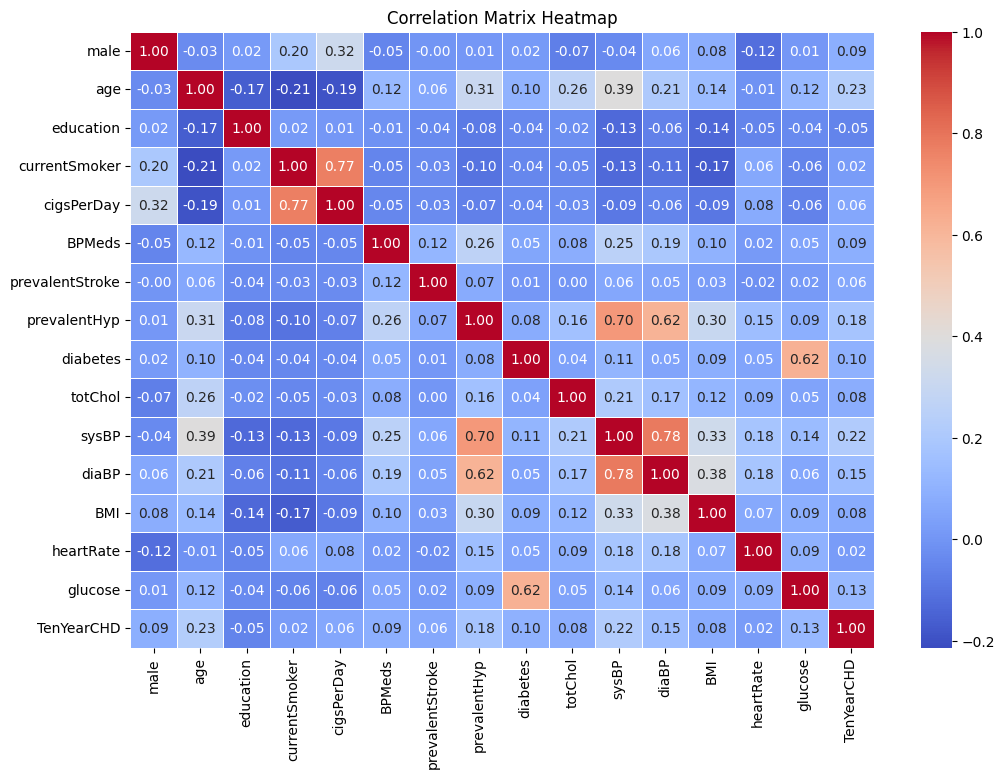

In [2]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**1.** Linear Regression

a) Plot the data

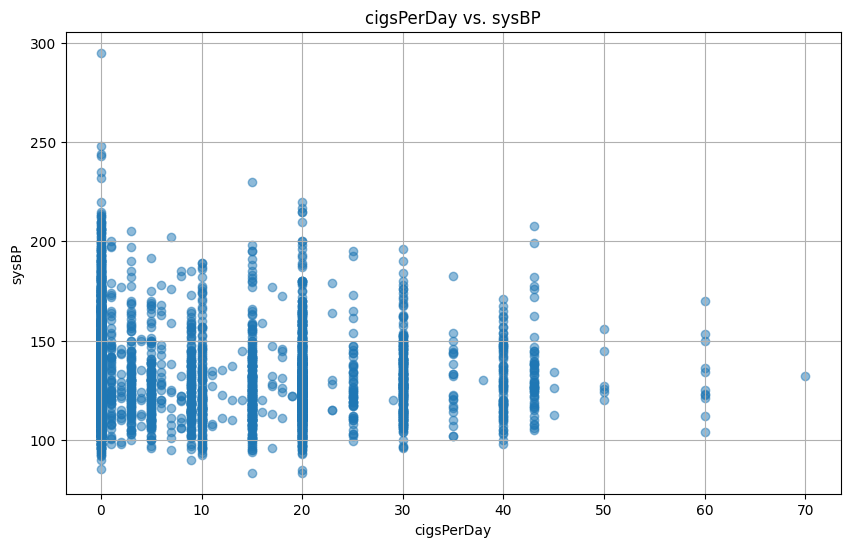

In [11]:
# Scatter plot of age vs. TenYearCHD
plt.figure(figsize=(10, 6))
plt.scatter(df['cigsPerDay'], df['sysBP'], alpha=0.5)
plt.title('cigsPerDay vs. sysBP')
plt.xlabel('cigsPerDay')
plt.ylabel('sysBP')
plt.grid(True)
plt.show()


b) Compute Cost Function



In [12]:
def compute_cost(X, y, theta):
    m = len(y) # Number of training examples
    predictions = X.dot(theta) # Predictions of hypothesis on all examples
    sq_errors = (predictions - y) ** 2 # Squre errors
    cost = (1 / (2 * m)) * np.sum(sq_errors) # Compute the cost
    return cost

In [13]:
# Add a column of ones to X (for the intercept term)
X = df['age'].values.reshape(-1, 1)
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
y = df['sysBP'].values

# Initialize theta
theta = np.zeros(2)

# Compute the cost
initial_cost = compute_cost(X, y, theta)
initial_cost

9001.361343794242

c) Make a function that run gradient descent




In [14]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)  # Number of training examples
    cost_history = []  # To store cost at each iteration

    for i in range(num_iters):
        predictions = X.dot(theta)  # Predictions of hypothesis on all examples
        errors = predictions - y# Errors
        gradient = (1 / m) * X.T.dot(errors) # Gradient calculation
        theta -= alpha * gradient # Update theta
        cost = compute_cost(X, y, theta)  # Save the cost at each iteration
        cost_history.append(cost)

    return theta, cost_history

In [15]:
# Run gradient descent
alpha = 0.01
num_iters = 1500

theta, cost_history = gradient_descent(X, y, theta, alpha, num_iters)

theta, cost_history[-1]

<ipython-input-12-9022f48c39da>:4: RuntimeWarning: overflow encountered in square
  sq_errors = (predictions - y) ** 2 # Squre errors
<ipython-input-14-e35783083129>:9: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradient # Update theta


(array([nan, nan]), nan)

It seems we get so large values in the data. To mitigate this, let's normalize the features before applying gradient descent and use a smaller learning rate.

g) Do the feature normalization

In [16]:
def feature_normalize(X):
    mean = np.mean(X, axis=0)  # Mean of each feature
    std = np.std(X, axis=0)  # Standard deviation of each feature
    X_norm = (X - mean) / std  # Normalize the features

    return X_norm, mean, std

In [17]:
# Normalize the age feature
X_norm, mean_age, std_age = feature_normalize(df['age'].values.reshape(-1, 1))

# Add intercept term to X_norm
X_norm = np.concatenate([np.ones((X_norm.shape[0], 1)), X_norm], axis=1)

# Initialize theta
theta = np.zeros(2)

# Run gradient descent with normalized features and smaller alpha
alpha = 0.001
num_iters = 1500

theta, cost_history = gradient_descent(X_norm, y, theta, alpha, num_iters)

print("Theta after gradient descent:", theta)
print("Final cost:", cost_history[-1])


Theta after gradient descent: [102.84274839   6.75138914]
Final cost: 642.3218255271041


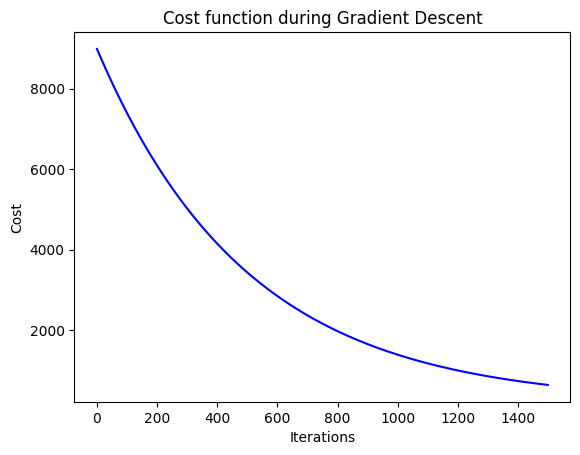

In [18]:
plt.plot(range(num_iters), cost_history, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function during Gradient Descent')
plt.show()

**e) Compute Cost for multivariate Gradient Descent**

In [20]:
# Select features: age and BMI
X_multi = df[['cigsPerDay', 'sysBP']].values

# Normalize the features
X_multi_norm, mean_multi, std_multi = feature_normalize(X_multi)

# Add intercept term to X_multi_norm
X_multi_norm = np.concatenate([np.ones((X_multi_norm.shape[0], 1)), X_multi_norm], axis=1)

# Initialize theta for multivariate regression
theta_multi = np.zeros(X_multi_norm.shape[1])

# Compute the initial cost for multivariate regression
initial_cost_multi = compute_cost(X_multi_norm, y, theta_multi)
initial_cost_multi

nan

It appears there is still an issue with the computation, resulting in NaN values. Let's troubleshoot this by checking the intermediate values for potential problems.

In [21]:
# Check mean and standard deviation for features
mean_multi, std_multi

# Check the first few rows of the normalized features
X_multi_norm[:5]


array([[ 1.        ,         nan, -1.19590711],
       [ 1.        ,         nan, -0.51518725],
       [ 1.        ,         nan, -0.22020864],
       [ 1.        ,         nan,  0.80087114],
       [ 1.        ,         nan, -0.10675533]])

The issue appears to be with the normalization process, as the BMI feature contains NaN values. Let's investigate the BMI column to see if there are missing values and handle them appropriately.

**Handling Missing Values**


We'll inspect the BMI column for missing values and decide on a strategy to handle them, such as filling with the mean or median.

In [23]:
# Check for missing values in the BMI column
missing_bmi = df['cigsPerDay'].isnull().sum()
missing_bmi

29

There are 19 missing values in the BMI column. Let's fill these missing values with the median of the BMI column and then proceed with normalization and multivariate linear regression.

e) Compute Cost for multivariate Gradient Descent

In [24]:
# Fill missing BMI values with the median
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)

# Select features: age and BMI
X_multi = df[['cigsPerDay', 'sysBP']].values

# Normalize the features again
X_multi_norm, mean_multi, std_multi = feature_normalize(X_multi)

# Add intercept term to X_multi_norm
X_multi_norm = np.concatenate([np.ones((X_multi_norm.shape[0], 1)), X_multi_norm], axis=1)

# Initialize theta for multivariate regression
theta_multi = np.zeros(X_multi_norm.shape[1])

# Compute the initial cost for multivariate regression
initial_cost_multi = compute_cost(X_multi_norm, y, theta_multi)
initial_cost_multi


9001.361343794242

In [25]:
# Run gradient descent for multivariate case
theta_multi, cost_history_multi = gradient_descent(X_multi_norm, y, theta_multi, alpha, num_iters)

print("Theta after multivariate gradient descent:", theta_multi)
print("Final cost:", cost_history_multi[-1])

Theta after multivariate gradient descent: [102.84274839  -0.6538578   17.07911156]
Final cost: 447.62020572963854


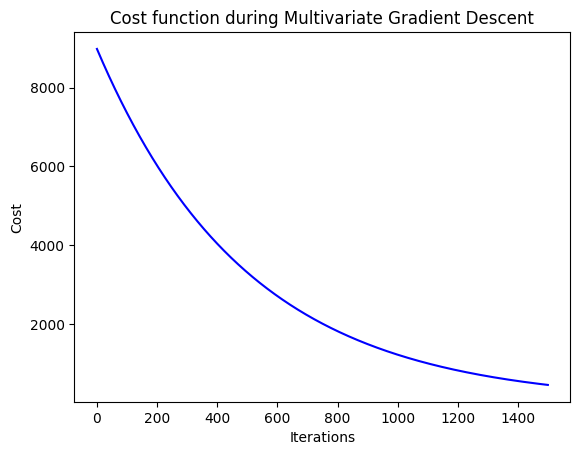

In [26]:
plt.plot(range(num_iters), cost_history_multi, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function during Multivariate Gradient Descent')
plt.show()

g) Make a function that computes the normal equation

In [27]:
def normal_equation(X, y):
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

# Compute theta using the normal equation
theta_normal = normal_equation(X_multi_norm, y)
theta_normal

array([1.32352407e+02, 1.21916366e-14, 2.20354964e+01])

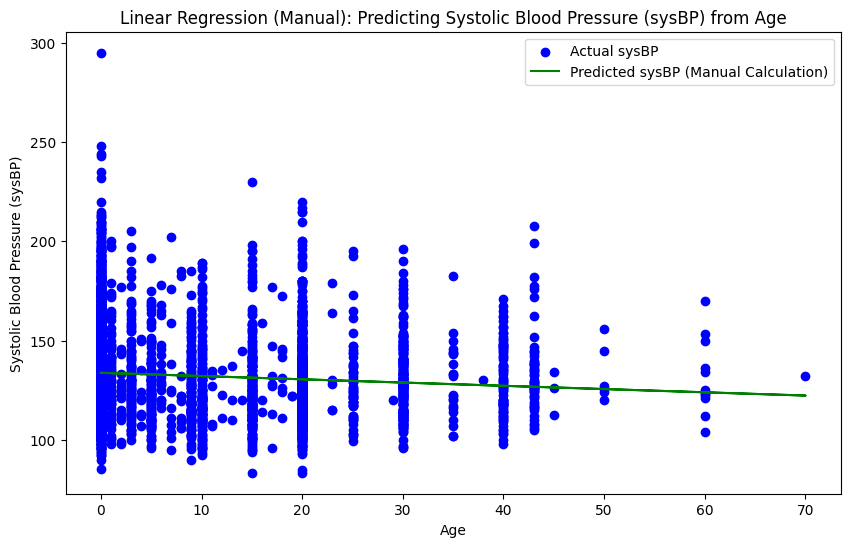

(-0.16363293423595204, 133.8155277040909)

In [28]:
# Extract the relevant data (age and sysBP)
X = df['cigsPerDay'].dropna().values
y = df['sysBP'].dropna().values

# Ensure the input features and target variable are aligned
X = X[:len(y)]

# Step 1: Calculate the mean of X and y
mean_X = X.mean()
mean_y = y.mean()

# Step 2: Calculate the slope (m)
numerator = sum((X - mean_X) * (y - mean_y))
denominator = sum((X - mean_X) ** 2)
m = numerator / denominator

# Step 3: Calculate the intercept (b)
b = mean_y - m * mean_X

# Step 4: Make predictions using the slope and intercept
y_pred_manual = m * X + b

# Plotting actual vs predicted sysBP
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual sysBP')
plt.plot(X, y_pred_manual, color='green', label='Predicted sysBP (Manual Calculation)')
plt.title('Linear Regression (Manual): Predicting Systolic Blood Pressure (sysBP) from Age')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure (sysBP)')
plt.legend()
plt.show()

m, b  # Returning slope and intercept values


**2. Logistic Regression**

a) Plot the data 1p

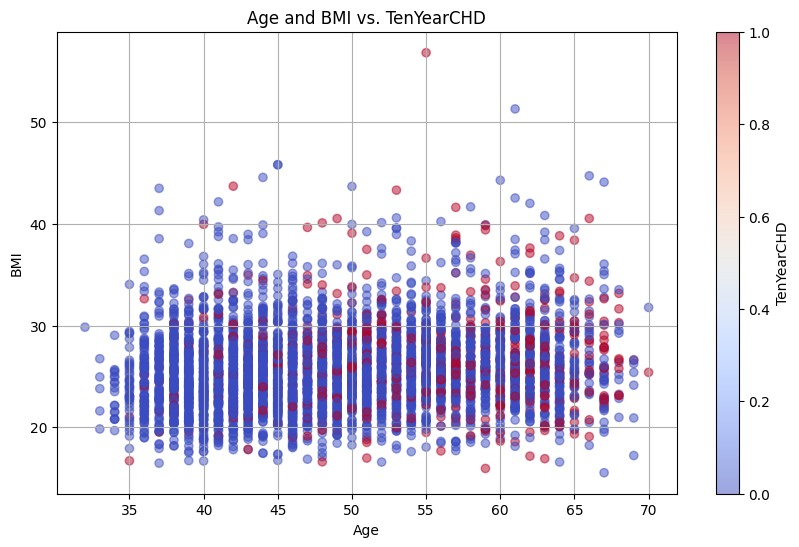

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['BMI'], c=df['TenYearCHD'], cmap='coolwarm', alpha=0.5)
plt.title('Age and BMI vs. TenYearCHD')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.colorbar(label='TenYearCHD')
plt.grid(True)
plt.show()

b) Make code that computes sigmoid function

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

c) Logistic Regression Cost Function

In [ ]:
def compute_cost_logistic(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    return cost

d) Prediction function

In [ ]:
def predict(X, theta):
    prob = sigmoid(X.dot(theta))
    return (prob >= 0.5).astype(int)



e) Regularized Cost Function


In [ ]:
def compute_cost_logistic_reg(X, y, theta, lambda_):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    reg_cost = cost + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    return reg_cost

In [ ]:
def gradient_descent_logistic(X, y, theta, alpha, num_iters, lambda_=0):
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        errors = h - y
        gradient = (1 / m) * X.T.dot(errors)
        reg_gradient = gradient + (lambda_ / m) * np.concatenate([[0], theta[1:]])
        theta -= alpha * reg_gradient
        cost = compute_cost_logistic_reg(X, y, theta, lambda_)
        cost_history.append(cost)

    return theta, cost_history

In [ ]:
# Prepare data
X = df[['age', 'BMI']].values
y = df['TenYearCHD'].values
X_norm, mean, std = feature_normalize(X)
X_norm = np.concatenate([np.ones((X_norm.shape[0], 1)), X_norm], axis=1)
# Initialize theta
theta = np.zeros(X_norm.shape[1])

# Compute initial cost
initial_cost = compute_cost_logistic(X_norm, y, theta)

In [ ]:
# Run gradient descent
alpha = 0.01
num_iters = 1500
lambda_ = 1  # Regularization parameter
theta, cost_history = gradient_descent_logistic(X_norm, y, theta, alpha, num_iters, lambda_)

# Prediction for a test sample (age=50, BMI=25, normalized)
test_sample = np.array([1, (50 - mean[0]) / std[0], (25 - mean[1]) / std[1]])
prediction = predict(test_sample, theta)

print("Thetha:",theta)

Thetha: [-1.59786853  0.44768076  0.10619371]


In [ ]:
# Calculate the number of correct predictions
correct_predictions = np.sum(prediction == y)
total_predictions = len(y)
accuracy = correct_predictions / total_predictions

correct_predictions, total_predictions, accuracy
print("Correct Predictions:",correct_predictions)
print("Total Predictions:",total_predictions)
print("Accuracy:", accuracy)

Correct Predictions: 3594
Total Predictions: 4238
Accuracy: 0.8480415290231241


Neural Network

In [ ]:
def sigmoid_gradient(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Randomly initialize weights
def rand_initialize_weights(L_in, L_out, epsilon_init=0.12):
    return np.random.rand(L_out, L_in + 1) * 2 * epsilon_init - epsilon_init

# Neural network cost function
def nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_):
    Theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)].reshape(hidden_layer_size, input_layer_size + 1)
    Theta2 = nn_params[hidden_layer_size * (input_layer_size + 1):].reshape(num_labels, hidden_layer_size + 1)

    m = X.shape[0]

    # Forward propagation
    a1 = np.concatenate([np.ones((m, 1)), X], axis=1)
    z2 = a1.dot(Theta1.T)
    a2 = np.concatenate([np.ones((m, 1)), sigmoid(z2)], axis=1)
    z3 = a2.dot(Theta2.T)
    a3 = sigmoid(z3)

    # Cost function
    y_matrix = pd.get_dummies(y.ravel()).values
    J = -1/m * np.sum(y_matrix * np.log(a3) + (1 - y_matrix) * np.log(1 - a3))

    # Regularization
    J += lambda_ / (2 * m) * (np.sum(np.square(Theta1[:, 1:])) + np.sum(np.square(Theta2[:, 1:])))

    return J

In [ ]:
# Prepare data
X = df[['age', 'BMI']].values
y = df['TenYearCHD'].values

X_norm, mean, std = feature_normalize(X)

# Neural network parameters
input_layer_size = X_norm.shape[1]
hidden_layer_size = 25
num_labels = 2
lambda_ = 1

# Randomly initialize the weights
initial_Theta1 = rand_initialize_weights(input_layer_size, hidden_layer_size)
initial_Theta2 = rand_initialize_weights(hidden_layer_size, num_labels)

# Unroll parameters
initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()], axis=0)

# Compute the cost
cost = nn_cost_function(initial_nn_params, input_layer_size, hidden_layer_size, num_labels, X_norm, y, lambda_)
print(f"Initial Cost: {cost}")

Initial Cost: 1.38670386010575


KMeans

a) Plot the data

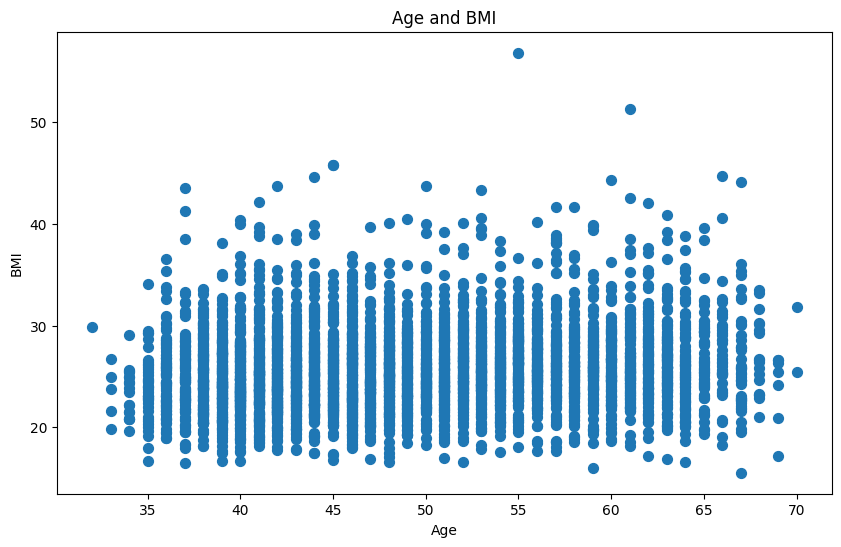

In [ ]:
# Prepare data
X = df[['age', 'BMI']].dropna().values

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


b) Initialize K-means centroids

In [ ]:
def initialize_centroids(X, K):
    m, n = X.shape
    centroids = X[np.random.choice(m, K, replace=False)]
    return centroids

c) Find the closest centroids

In [ ]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    K = centroids.shape[0]
    idx = np.zeros(m)
    for i in range(m):
        min_dist = np.inf
        for j in range(K):
            dist = np.sum((X[i] - centroids[j]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx

d) Compute centroids means

In [ ]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis=0)
    return centroids

e) Run K-means algorithm

In [ ]:
def run_kmeans(X, initial_centroids, max_iters):
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(X.shape[0])

    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)

        # f) Plot each step of K-means as it processes
        plt.figure(figsize=(10, 6))
        plt.scatter(X[:, 0], X[:, 1], c=idx, s=50, cmap='viridis')
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
        plt.title(f'Iteration {i + 1}')
        plt.xlabel('Age')
        plt.ylabel('BMI')
        plt.show()

        # Check for convergence
        if np.all(previous_centroids == centroids):
            break
        previous_centroids = centroids

    return centroids, idx

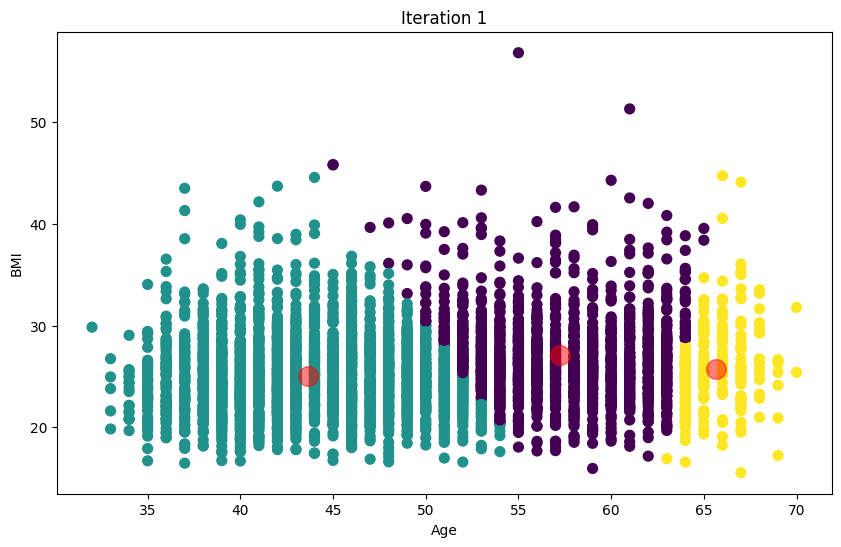

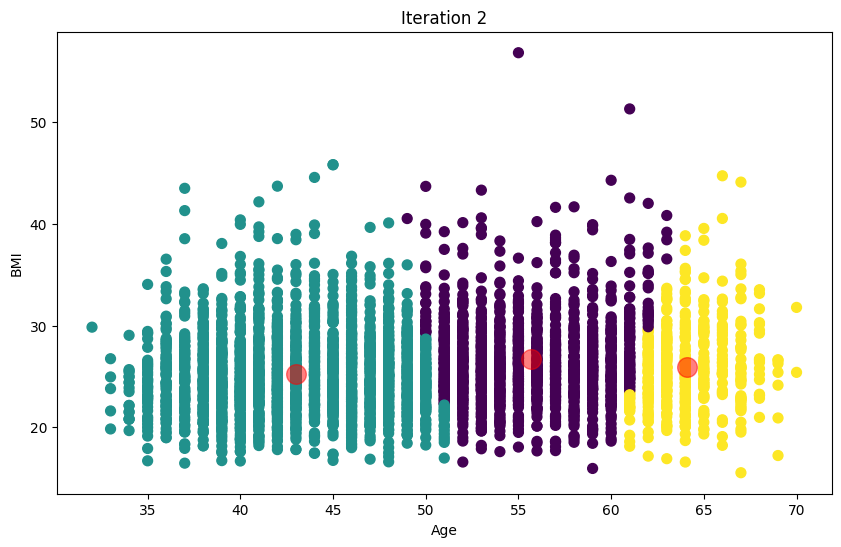

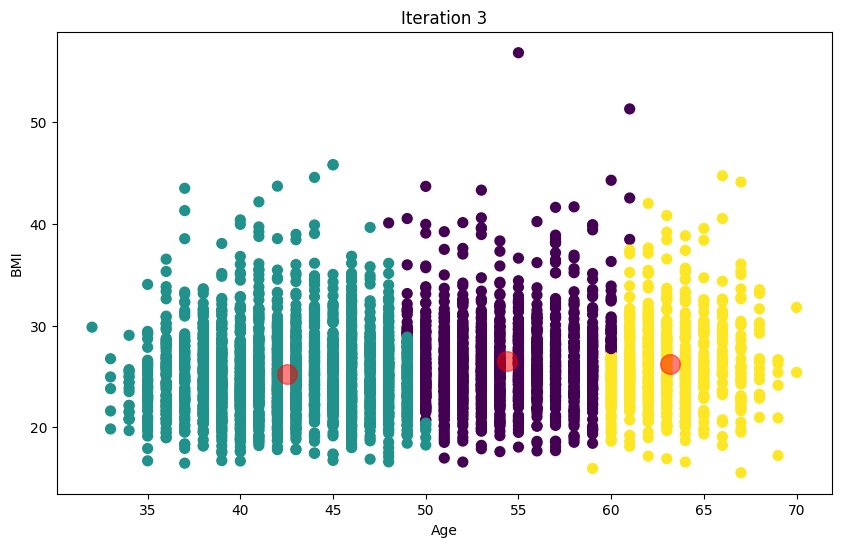

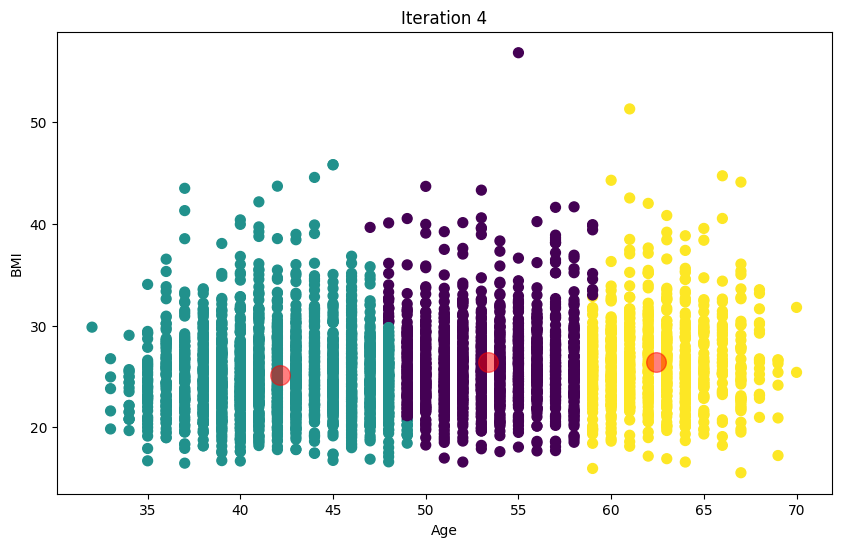

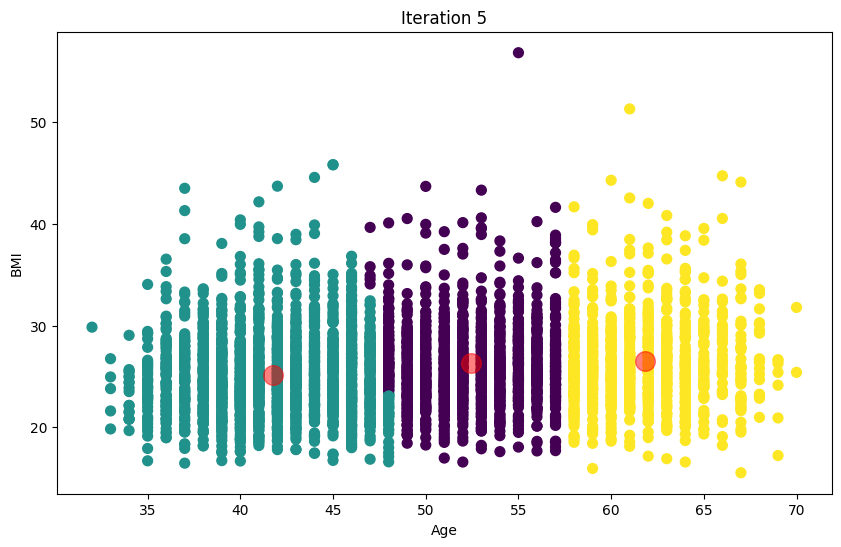

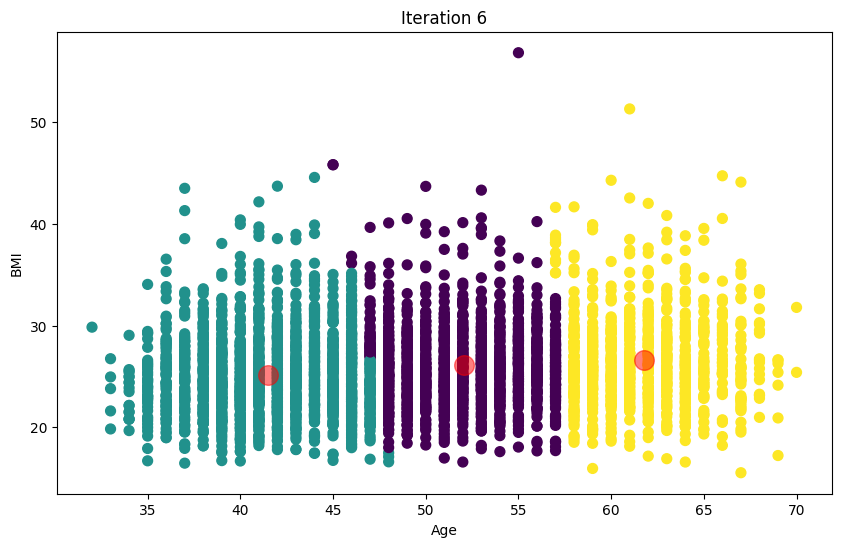

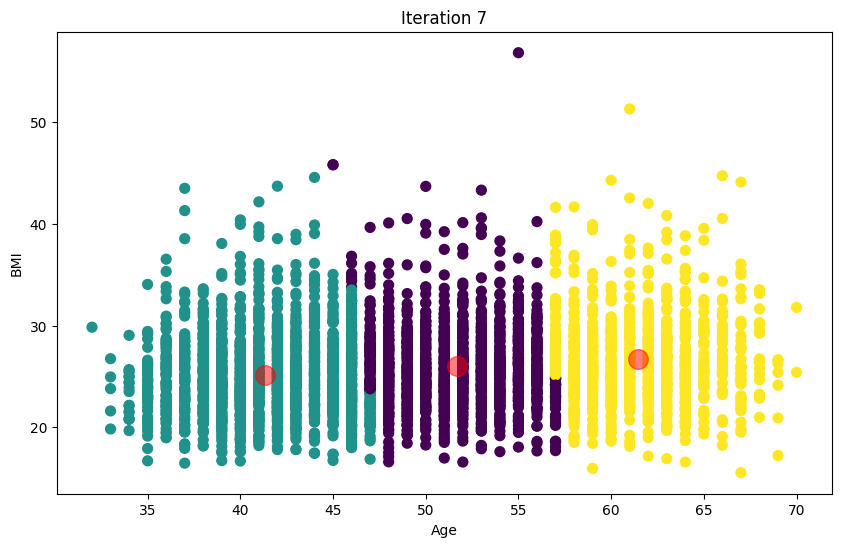

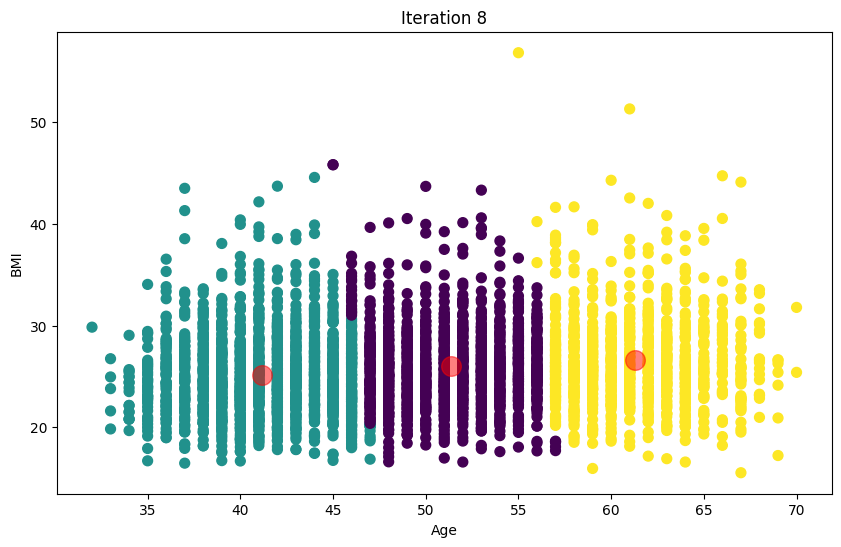

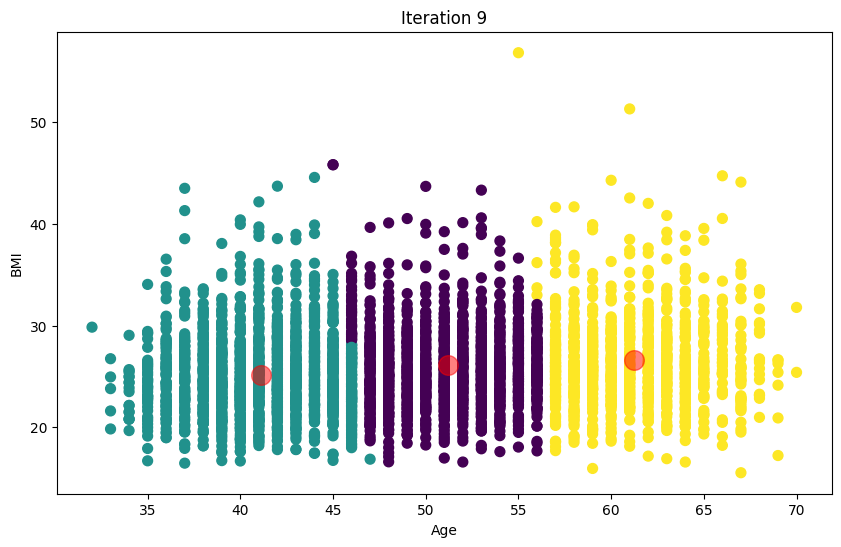

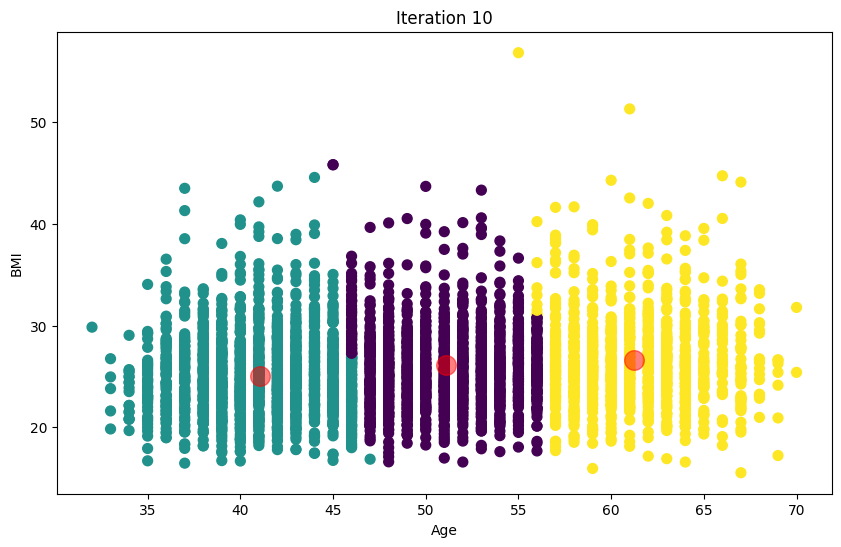

In [ ]:
# Number of clusters
K = 3
max_iters = 10
initial_centroids = initialize_centroids(X, K)
centroids, idx = run_kmeans(X, initial_centroids, max_iters)
